In [3]:
%cd /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj
%pwd

/home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj


'/home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj'

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from faceted_visualization.visualizer import main
import ast
import pprint
logger = main.logger

In [5]:
from PIL import Image
import numpy as np

def tensor_to_img_array(tensor):
    image = tensor.cpu().detach().numpy()
    image = np.transpose(image, [0, 2, 3, 1])
    return image

def show_image(tensor):
    image = tensor_to_img_array(tensor)
    assert len(image.shape) in [
        3,
        4,
    ], "Image should have 3 or 4 dimensions, invalid image shape {}".format(image.shape)
    # Change dtype for PIL.Image
    image = (image * 255).astype(np.uint8)
    if len(image.shape) == 4:
        image = np.concatenate(image, axis=1)
    display(Image.fromarray(image))

%matplotlib inline

In [6]:
with open(os.path.join("faceted_visualization", "visualizer", "config", "run_configs.json")) as f:
    properties = ast.literal_eval(f.read())
logger.info("Load properties = \n%s", pprint.pformat(properties))

2023-11-29 20:13:06,372 [MainThread  ] [INFO ]  Load properties = 
{'channel': 512,
 'image_h': 224,
 'image_w': 224,
 'img_use_decorrelate': True,
 'img_use_fft': True,
 'learning_rate': 0.05,
 'linear_probe_layer': 'layer1_2_relu3',
 'linear_probe_model': 'model_checkpoint.pth',
 'model': 'RN50',
 'num_iterations': 512,
 'objective': 'channel',
 'optimizer': 'AdamW',
 'output_directory': '/home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/layer1_2_relu3/version_29/runs',
 'probe_checkpoint_directory': '/home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/layer1_2_relu3/version_29',
 'visualization_layer': 'layer4_2_conv3'}


In [7]:
def show_images(root, dir_dict):
    for dataset, fnames in dir_dict.items():
        for fname in fnames:
            linear_probe_layer, version = fname.split("/")
            properties["probe_checkpoint_directory"] = os.path.join(root, dataset, fname)
            properties["output_directory"] = os.path.join(root, dataset, fname, "runs")
            properties["linear_probe_layer"] = linear_probe_layer
            properties["objective"] = 'neuron'

            image_f = main.orchestrate(config=properties)
            print(fname)
            show_image(image_f())

2023-11-29 20:13:09,780 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:13:16,289 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:13:16,292 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:13:16,294 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:13:16,303 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:13:16,304 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/celeba/layer1_2_relu3/version_29/model_checkpoint.pth ]
2023-11-29 20:13:16,311 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:13:18,944 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -5.2773438 :: Learning Rate = 0.0500000
2023-11-29 20:13:23,516 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -2.7460938 :: Learning Rate = 0.0500000
2023-11-29 20:13:28,216 [MainThread  ] [INFO ]  Ep

layer1_2_relu3/version_29


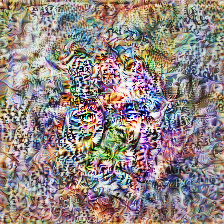

2023-11-29 20:13:42,969 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:13:46,194 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:13:46,195 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:13:46,197 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:13:46,200 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:13:46,200 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/celeba/layer2_3_relu3/version_1/model_checkpoint.pth ]
2023-11-29 20:13:46,203 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:13:46,370 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -0.1132202 :: Learning Rate = 0.0500000
2023-11-29 20:13:50,805 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -2.9531250 :: Learning Rate = 0.0500000
2023-11-29 20:13:54,885 [MainThread  ] [INFO ]  Epo

layer2_3_relu3/version_1


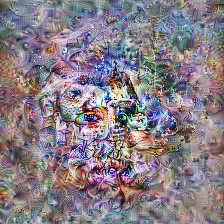

2023-11-29 20:14:08,516 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:14:11,328 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:14:11,329 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:14:11,331 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:14:11,333 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:14:11,334 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/celeba/layer3_5_relu3/version_1/model_checkpoint.pth ]
2023-11-29 20:14:11,337 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:14:11,368 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -0.3425293 :: Learning Rate = 0.0500000
2023-11-29 20:14:15,268 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -1.9609375 :: Learning Rate = 0.0500000
2023-11-29 20:14:19,354 [MainThread  ] [INFO ]  Epo

layer3_5_relu3/version_1


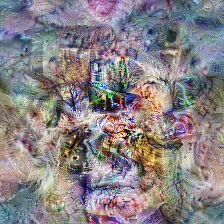

2023-11-29 20:14:32,008 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:14:34,295 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:14:34,296 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:14:34,298 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:14:34,300 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:14:34,301 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/celeba/layer4_2_relu2/version_3/model_checkpoint.pth ]
2023-11-29 20:14:34,320 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:14:34,355 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = 0.1630859 :: Learning Rate = 0.0500000
2023-11-29 20:14:37,336 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -10.3203125 :: Learning Rate = 0.0500000
2023-11-29 20:14:40,417 [MainThread  ] [INFO ]  Epo

layer4_2_relu2/version_3


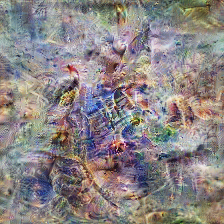

2023-11-29 20:14:50,126 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:14:52,571 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:14:52,573 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:14:52,576 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:14:52,579 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:14:52,581 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/celeba/layer4_2_relu2/version_5/model_checkpoint.pth ]
2023-11-29 20:14:52,601 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:14:52,637 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = 0.1258545 :: Learning Rate = 0.0500000
2023-11-29 20:14:55,639 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -8.0234375 :: Learning Rate = 0.0500000
2023-11-29 20:14:58,593 [MainThread  ] [INFO ]  Epoc

layer4_2_relu2/version_5


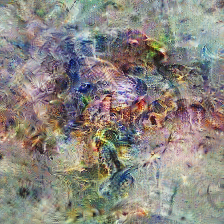

2023-11-29 20:15:08,440 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:15:10,699 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:15:10,700 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:15:10,702 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:15:10,705 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:15:10,706 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/air/layer1_2_relu3/version_1/model_checkpoint.pth ]
2023-11-29 20:15:10,740 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:15:10,818 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -1.0146484 :: Learning Rate = 0.0500000
2023-11-29 20:15:15,422 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -8.3515625 :: Learning Rate = 0.0500000
2023-11-29 20:15:20,026 [MainThread  ] [INFO ]  Epoch:

layer1_2_relu3/version_1


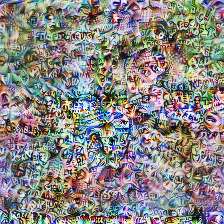

2023-11-29 20:15:34,535 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:15:36,903 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:15:36,904 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:15:36,906 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:15:36,908 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:15:36,909 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/air/layer4_2_relu2/version_1/model_checkpoint.pth ]
2023-11-29 20:15:36,911 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:15:36,954 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = 0.6625977 :: Learning Rate = 0.0500000
2023-11-29 20:15:40,087 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -25.4062500 :: Learning Rate = 0.0500000
2023-11-29 20:15:43,078 [MainThread  ] [INFO ]  Epoch:

layer4_2_relu2/version_1


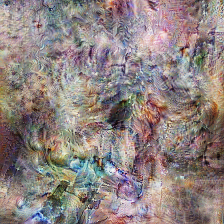

2023-11-29 20:15:52,883 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:15:55,384 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:15:55,385 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:15:55,387 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:15:55,389 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:15:55,390 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/flower/layer1_2_relu3/version_1/model_checkpoint.pth ]
2023-11-29 20:15:55,393 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:15:55,432 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -1.2558594 :: Learning Rate = 0.0500000
2023-11-29 20:16:00,309 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -3.5781250 :: Learning Rate = 0.0500000
2023-11-29 20:16:04,882 [MainThread  ] [INFO ]  Epo

layer1_2_relu3/version_1


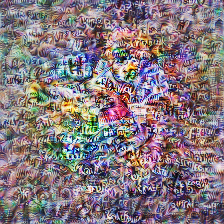

2023-11-29 20:16:19,682 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:16:21,974 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:16:21,976 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:16:21,978 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:16:21,985 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:16:21,986 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/flower/layer4_2_relu2/version_1/model_checkpoint.pth ]
2023-11-29 20:16:22,172 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:16:22,267 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = 0.7397461 :: Learning Rate = 0.0500000
2023-11-29 20:16:25,371 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -21.8125000 :: Learning Rate = 0.0500000
2023-11-29 20:16:28,487 [MainThread  ] [INFO ]  Epo

layer4_2_relu2/version_1


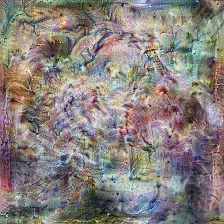

2023-11-29 20:16:38,168 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:16:40,583 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:16:40,585 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:16:40,587 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:16:40,592 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:16:40,593 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/sun397/layer1_2_relu3/version_7/model_checkpoint.pth ]
2023-11-29 20:16:40,596 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:16:40,637 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = -0.0382690 :: Learning Rate = 0.0500000
2023-11-29 20:16:45,366 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -8.2656250 :: Learning Rate = 0.0500000
2023-11-29 20:16:50,160 [MainThread  ] [INFO ]  Epo

layer1_2_relu3/version_7


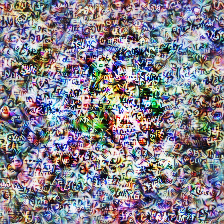

2023-11-29 20:17:04,568 [MainThread  ] [INFO ]  Loading CLIP model [ RN50 ].
2023-11-29 20:17:06,870 [MainThread  ] [INFO ]  Finished loading model [ RN50 ]
2023-11-29 20:17:06,871 [MainThread  ] [INFO ]  Registering hooks.
2023-11-29 20:17:06,872 [MainThread  ] [INFO ]  Finished registering hooks.
2023-11-29 20:17:06,877 [MainThread  ] [INFO ]  Creating AdamW optimizer with params [ lr = 0.05000 ]
2023-11-29 20:17:06,877 [MainThread  ] [INFO ]  Retrieving weights of linear probe [ path = /home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/sun397/layer4_2_relu2/version_2/model_checkpoint.pth ]
2023-11-29 20:17:06,879 [MainThread  ] [INFO ]  Starting optimization process [ run_id = run_20231129201256 ]...
2023-11-29 20:17:06,941 [MainThread  ] [INFO ]  Epoch: 1/512: Loss = 2.4101562 :: Learning Rate = 0.0500000
2023-11-29 20:17:09,999 [MainThread  ] [INFO ]  Epoch: 101/512: Loss = -42.3125000 :: Learning Rate = 0.0500000
2023-11-29 20:17:12,988 [MainThread  ] [INFO ]  Epo

layer4_2_relu2/version_2


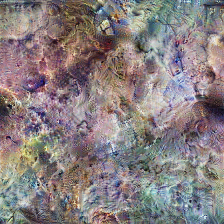

In [8]:

root = "/home/nas2_userH/hyesulim/Dev/2023/11785-f23-prj/linear_probe/logs/"

dir_dict = {
            "celeba" : ["layer1_2_relu3/version_29", "layer2_3_relu3/version_1", "layer3_5_relu3/version_1", "layer4_2_relu2/version_3", "layer4_2_relu2/version_5"],
            "air": ["layer1_2_relu3/version_1", "layer4_2_relu2/version_1"],
            "flower": ["layer1_2_relu3/version_1", "layer4_2_relu2/version_1"],
            "sun397": ["layer1_2_relu3/version_7", "layer4_2_relu2/version_2"]}

show_images(root, dir_dict)